## Regression Project

In this project, data of around 4000 apartmens in Tehran are prepared. All the data are real. Your responsibility is to estimate the price using the data features described below. Data are stored in the housePrice.csv file.
- Area in meters
- Number of rooms
- Parking
- Warehouse
- Elevator
- Address
- Price
- Price in USD

In this dataset, some houses do not have address and also the Area in some of them are entered incorecctly (having a very large value). You have to manage these as well and delete them from the dataset.


### Importing Needed packages

In [300]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
# %matplotlib inline

### Reading the data in

In [301]:
df = pd.read_csv("housePrice.csv", thousands=',')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [302]:
# find wrong data in Area column
df.sort_values(by=['Area'], ascending=False).head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
709,16160000000,3,True,True,True,Pasdaran,1.616000e+10,538666.67
1604,8400000000,2,True,True,True,Gheitarieh,8.700000e+09,290000.00
570,3310000000,2,True,True,True,Ostad Moein,3.310000e+09,110333.33
2802,2550000000,2,True,True,True,Central Janatabad,2.550000e+09,85000.00
2171,3600,2,False,False,False,Shahryar,9.720000e+09,324000.00


In [303]:
# drop nan and wrong data and convert boolean type data to int
cdf = df[df.Area < 10000]
cdf = cdf.dropna()
cdf["Parking"] = cdf["Parking"].astype(int)
cdf["Warehouse"] = cdf["Warehouse"].astype(int)
cdf["Elevator"] = cdf["Elevator"].astype(int)
cdf.sort_values(by=['Area'], ascending=False).head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2171,3600,2,0,0,0,Shahryar,9.720000e+09,324000.00
807,1000,2,1,1,0,Damavand,7.000000e+09,233333.33
1694,929,5,1,1,0,Zafar,8.000000e+10,2666666.67
1974,900,3,1,1,0,Damavand,8.500000e+09,283333.33
573,863,2,1,1,1,Gheitarieh,7.830000e+09,261000.00


In [304]:
# Checking if there are any nan cells
cdf.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

### Converting Addresses to number

In [305]:
print(cdf['Address'].value_counts().shape)
cdf['Address'].value_counts()

(192,)


Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                140
Shahran                   130
                         ... 
Chardivari                  1
Shadabad                    1
Mirza Shirazi               1
Thirteen November           1
Ray - Montazeri             1
Name: Address, Length: 192, dtype: int64

Since Address is a very important factor in estimating the price of the apartment, the addresses are first linked to their mean price, then sorted by their price and mapped to their index.

In [306]:
Address_df = cdf.groupby('Address').mean()['Price'].reset_index()
Address_df = Address_df.sort_values(by=['Price']).reset_index()
Address_df.insert(0, 'codedAddress', range(1, len(Address_df)+1))
df1 = pd.Series(Address_df.codedAddress.values,index=Address_df.Address).to_dict()
cdf["Address"] = cdf["Address"].map(df1)

In [307]:
cdf.sort_values(by=['Address']).head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1518,75,2,0,1,0,1,250000000.0,8333.33
2736,50,1,0,0,0,1,250000000.0,8333.33
2618,64,1,1,1,1,2,350000000.0,11666.67
2613,55,1,1,1,0,2,305000000.0,10166.67
2196,80,1,0,0,0,3,380000000.0,12666.67
3257,72,2,0,0,0,3,300000000.0,10000.00
3287,77,2,1,1,0,4,470000000.0,15666.67
2916,65,1,1,1,1,5,510000000.0,17000.00
3095,107,2,1,1,1,6,550000000.0,18333.33
2294,79,2,1,1,1,6,410000000.0,13666.67


In [308]:
cdf.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
count,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3.452000e+03,3.452000e+03
mean,108.188007,2.081112,0.847335,0.914832,0.787080,106.426709,5.377292e+09,1.792431e+05
std,92.734668,0.759998,0.359717,0.279172,0.409431,52.960947,8.123946e+09,2.707982e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,71.000000,1.419750e+09,4.732500e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,105.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,164.000000,6.000000e+09,2.000000e+05
max,3600.000000,5.000000,1.000000,1.000000,1.000000,192.000000,9.240000e+10,3.080000e+06


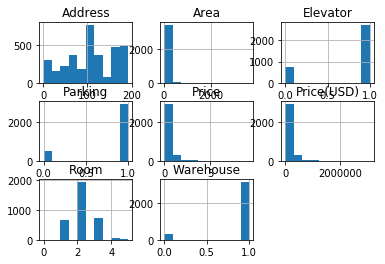

In [309]:
viz = cdf
viz.hist()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

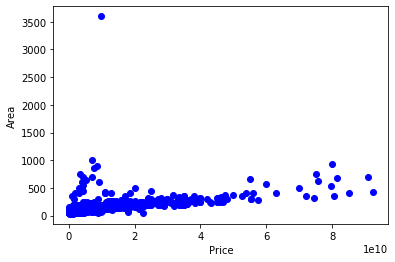

In [310]:
plt.scatter(cdf.Price, cdf.Area, color='blue')
plt.xlabel("Price")
plt.ylabel("Area")
plt.show

### Splitting the train and test datasets

In [311]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Linear Regression
Using linear regression for prediction of the price of the buildings based on the selected features

In [312]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','Address']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x,train_y)
# print ('Coefficients: ', regr.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Evaluating the results of the linear regression

In [313]:
y_hat = regr.predict(test[['Area','Room','Parking','Warehouse','Elevator','Address']])
test_x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','Address']])
test_y = np.asanyarray(test[['Price']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))

Residual sum of squares: 33449729108316340224.00
Variance score: 0.57


It can be seen that the linear regression method does not perform well in predicting the price in the test data set.
So in the next step, Polynomial method is implemented.

### Polynomial regression

In [314]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

In [315]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

In [316]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 1435831583.04
Residual sum of squares (MSE): 8976624185594387456.00
R2-score: 0.88


The polynomial regression performed well in predictinng the price of the buildings in the test data set and the equations with the following coefficients and intercept can be used for the final price estimation:

In [317]:
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[-4.50232619e+01  5.07843801e+07 -9.52219462e+09  5.65814133e+08
  -6.66108736e+08 -8.96378922e+08  6.08478863e+07  1.31550692e+04
  -1.17264473e+07 -2.58028482e+05  2.70657598e+06 -1.72231498e+07
  -1.59120651e+06  3.83329313e+09 -1.21207807e+09  8.12294144e+08
   2.79374399e+09  5.95655618e+07  5.65813797e+08 -2.67960488e+08
   5.25756229e+08 -4.18458087e+06 -6.66108619e+08  2.74080379e+08
   2.86958586e+06 -8.96378922e+08 -5.06588144e+06 -4.64058526e+05
   1.11494746e+01 -4.94850773e+04  1.91059877e+04 -7.23021050e+03
  -2.15525238e+05  5.82936541e+02  2.45201846e+06  4.71042065e+06
   1.69945765e+07  7.99335657e+06  2.02674821e+05 -2.58031013e+05
   2.21423907e+06 -9.63973827e+06 -1.85798576e+05  2.70657609e+06
  -1.90180074e+05 -3.88337891e+05 -1.72231511e+07  1.02199622e+06
   8.09017111e+03 -4.11542847e+08  1.40312981e+08 -1.04555838e+09
  -1.18406638e+09 -6.83178685e+06 -1.21207806e+09  8.56881050e+08
   2.66483369e+08  1.39933481e+07  8.12294134e+08 -5.06937517